# いろいろ試す場所

## CNN

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

c:\users\honda\appdata\local\programs\python\python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
BATCH_SIZE = 100
WEIGHT_DECAY = 0.005
LEARNING_RATE = 0.0001
EPOCH = 100
PATH = '~/Documents/work/MNISTDataset/data'

In [4]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root = PATH, train = True, download = True, transform = transform)
print(trainset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\honda/Documents/work/MNISTDataset/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 1)

In [6]:
testset = torchvision.datasets.MNIST(root = PATH, train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 1)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(1,16,3)
        self.conv2 = nn.Conv2d(16,32,3)

        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=WEIGHT_DECAY)
print(net)

Net(
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [9]:
print(criterion)

CrossEntropyLoss()


In [10]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.005
)


In [11]:
train_loss_value=[]
train_acc_value=[]
test_loss_value=[]
test_acc_value=[]

In [12]:
for epoch in range(EPOCH):
    print('epoch', epoch+1)
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    sum_loss = 0.0
    sum_correct = 0
    sum_total = 0

    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()
        _, predicted = outputs.max(1)
        sum_total += labels.size(0)
        sum_correct += (predicted == labels).sum().item()
    print("train mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(trainloader.dataset), float(sum_correct/sum_total)))
    train_loss_value.append(sum_loss*BATCH_SIZE/len(trainloader.dataset))
    train_acc_value.append(float(sum_correct/sum_total))

    sum_loss = 0.0
    sum_correct = 0
    sum_total = 0

    for (inputs, labels) in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()
        _, predicted = outputs.max(1)
        sum_total += labels.size(0)
        sum_correct += (predicted == labels).sum().item()
    print("test  mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(testloader.dataset), float(sum_correct/sum_total)))
    test_loss_value.append(sum_loss*BATCH_SIZE/len(testloader.dataset))
    test_acc_value.append(float(sum_correct/sum_total))

epoch 1
train mean loss=2.257499394416809, accuracy=0.21251666666666666
test  mean loss=2.2562734842300416, accuracy=0.2031
epoch 2
train mean loss=2.1787297133604686, accuracy=0.54525
test  mean loss=2.1756068158149717, accuracy=0.5531
epoch 3
train mean loss=2.0090583489338556, accuracy=0.6299833333333333
test  mean loss=2.0023433125019072, accuracy=0.6456
epoch 4
train mean loss=1.621029993693034, accuracy=0.6776
test  mean loss=1.6066082227230072, accuracy=0.689
epoch 5
train mean loss=1.072057643632094, accuracy=0.7710666666666667
test  mean loss=1.0511625134944915, accuracy=0.7814
epoch 6
train mean loss=0.7316808210810025, accuracy=0.82145
test  mean loss=0.7108689260482788, accuracy=0.8312
epoch 7
train mean loss=0.5810497169196606, accuracy=0.8462333333333333
test  mean loss=0.5616454482078552, accuracy=0.8551
epoch 8
train mean loss=0.5002262691656748, accuracy=0.86125
test  mean loss=0.4816652769595385, accuracy=0.8694
epoch 9
train mean loss=0.45006513841450213, accuracy=0.

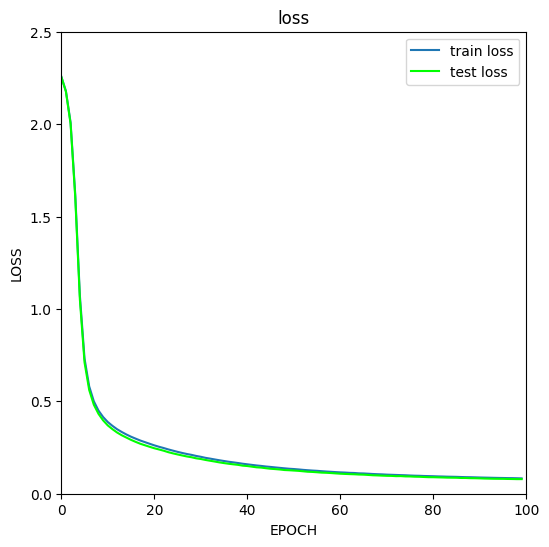

In [13]:
plt.figure(figsize=(6,6))

plt.plot(range(EPOCH), train_loss_value)
plt.plot(range(EPOCH), test_loss_value, c='#00ff00')
plt.xlim(0, EPOCH)
plt.ylim(0, 2.5)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend(['train loss', 'test loss'])
plt.title('loss')
plt.show()

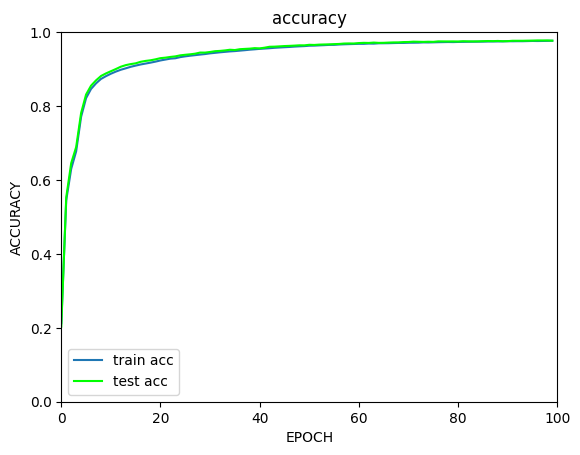

In [14]:
plt.plot(range(EPOCH), train_acc_value)
plt.plot(range(EPOCH), test_acc_value, c='#00ff00')
plt.xlim(0, EPOCH)
plt.ylim(0, 1)
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend(['train acc', 'test acc'])
plt.title('accuracy')
plt.show()

## コードを分析したい

In [ ]:
import os
import torch
import numpy as np
import random
import json
import math
import sys
from typing import Iterable
import argparse
import time
import datetime
import re
from util import dist
from torch.utils.data import DataLoader, DistributedSampler
from collections import namedtuple
from functools import reduce

from dataset import densevideocaptioning_collate_fn, build_densevideocaptioning_dataset, build_yt_dataset, yt_collate_fn
from model import build_vid2seq_model, _get_tokenizer
from args import get_args_parser
from util.misc import adjust_learning_rate
from util.metrics import MetricLogger
from dvc_eval import eval_dvc, eval_soda


def train_one_epoch(
    model: torch.nn.Module,
    data_loader: Iterable,
    optimizer: torch.optim.Optimizer,
    device: torch.device,
    epoch: int,
    args,
):
    model.train()
    metric_logger = MetricLogger(delimiter="  ")
    header = "Epoch: [{}]".format(epoch)
    num_training_steps = int(len(data_loader) * args.epochs)

    for i_batch, batch_dict in enumerate(
        metric_logger.log_every(data_loader, args.print_freq, header)
    ):
        video = batch_dict["video"].to(device)
        output_tokens = batch_dict["output_tokens"].to(device)
        output_tokenized = {'input_ids': output_tokens,
                            'attention_mask': output_tokens != 0}
        if "input_tokens" not in batch_dict and args.use_speech:
            input_tokens = torch.ones((output_tokens.shape[0], 1)).long().to(device)
            input_tokenized = {'input_ids': input_tokens, 'attention_mask': input_tokens != 0}
        elif "input_tokens" in batch_dict:
            input_tokens = batch_dict["input_tokens"].to(device)
            input_tokenized = {'input_ids': input_tokens, 'attention_mask': input_tokens != 0}
        else:
            input_tokenized = {'input_ids': None, 'attention_mask': None}

        # forward
        if args.genasr and args.generative:  # vid2seq style generative loss on speech sequence
            geninput_tokens = torch.ones((output_tokens.shape[0], 1)).long().to(device)
            geninput_tokenized = {'input_ids': geninput_tokens, 'attention_mask': geninput_tokens != 0}
            loss_dict, video_dict = model(
                video=video,
                input_tokenized=geninput_tokenized,
                output_tokenized=input_tokenized,
            )
            loss = args.generative * loss_dict["loss"]

        elif args.generative:
            loss_dict, video_dict = model(
                video=video,
                input_tokenized=input_tokenized,
                output_tokenized=output_tokenized,
            )
            loss = args.generative * loss_dict["loss"]

        if args.denoising:
            denoising_output_tokens = batch_dict["denoising_output_tokens"].to(device)
            denoising_output_tokenized = {'input_ids': denoising_output_tokens, 'attention_mask': denoising_output_tokens != 0}
            denoising_input_tokens = batch_dict["denoising_input_tokens"].to(device)
            denoising_input_tokenized = {'input_ids': denoising_input_tokens, 'attention_mask': denoising_input_tokens != 0}
            if args.generative:
                denoising_loss_dict, _ = model(
                    video=video_dict,
                    input_tokenized=denoising_input_tokenized,
                    output_tokenized=denoising_output_tokenized,
                )
                loss_dict.update({"denoising_loss": denoising_loss_dict["loss"]})
                loss += args.denoising * denoising_loss_dict["loss"]
            else:
                denoising_loss_dict, _ = model(
                    video=video,
                    input_tokenized=denoising_input_tokenized,
                    output_tokenized=denoising_output_tokenized,
                )
                loss_dict = {"denoising_loss": denoising_loss_dict["loss"]}
                loss = args.denoising * denoising_loss_dict["loss"]

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = dist.reduce_dict(loss_dict)
        loss_reduced = sum(loss_dict_reduced.values())
        loss_value = loss_reduced.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        loss.backward()
        if args.clip_max_norm > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip_max_norm)
        optimizer.step()

        with torch.no_grad():
            # Normalize time embeddings.
            frozen_norm = torch.norm(model.t5_model.shared.weight[:-args.num_bins, :], dim=1).mean(0)
            trainable_weight = model.t5_model.shared.weight[-args.num_bins:, :]
            model.t5_model.shared.weight[-args.num_bins:, :].div_(torch.norm(trainable_weight, dim=1).mean(0) / frozen_norm)

            frozen_norm = torch.norm(model.t5_model.lm_head.weight[:-args.num_bins, :], dim=1).mean(0)
            trainable_weight = model.t5_model.lm_head.weight[-args.num_bins:, :]
            model.t5_model.lm_head.weight[-args.num_bins:, :].div_(torch.norm(trainable_weight, dim=1).mean(0) / frozen_norm)

        adjust_learning_rate(
            optimizer,
            curr_step=epoch * len(data_loader) + i_batch,
            num_training_steps=num_training_steps,
            args=args,
        )

        metric_logger.update(loss=loss_value)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])
    # gather the stats from all processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)
    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}


@torch.no_grad()
def evaluate(
    model: torch.nn.Module,
    data_loader,
    device: torch.device,
    args,
    split="test",
    dataset_name="chapters"
):
    model.eval()
    metric_logger = MetricLogger(delimiter="  ")
    header = f"{split}:"

    res = {}

    for i_batch, batch_dict in enumerate(
        metric_logger.log_every(data_loader, args.print_freq, header)
    ):
        duration = batch_dict["duration"]
        video = batch_dict["video"].to(device)
        if "input_tokens" not in batch_dict and args.use_speech:
            input_tokens = torch.ones((video.shape[0], 1)).long().to(device)
            input_tokenized = {'input_ids': input_tokens, 'attention_mask': input_tokens != 0}
        elif "input_tokens" in batch_dict:
            input_tokens = batch_dict["input_tokens"].to(device)
            input_tokenized = {'input_ids': input_tokens, 'attention_mask': input_tokens != 0}
        else:
            input_tokenized = {'input_ids': None, 'attention_mask': None}

        output = model.generate(video=video,
                                input_tokenized=input_tokenized,
                                use_nucleus_sampling=args.num_beams == 0,
                                num_beams=args.num_beams,
                                max_length=args.max_output_tokens,
                                min_length=1,
                                top_p=args.top_p,
                                repetition_penalty=args.repetition_penalty,
                                length_penalty=args.length_penalty,
                                num_captions=1,
                                temperature=1)
        for i, vid in enumerate(batch_dict["video_id"]):
            sequences = re.split(r'(?<!<)\s+(?!>)', output[i]) # "<time=5> <time=7> Blablabla <time=7> <time=9> Blobloblo <time=2>" -> ['<time=5>', '<time=7>', 'Blablabla', '<time=7>', '<time=9>', 'Blobloblo', '<time=2>']
            indexes = [j for j in range(len(sequences) - 1) if sequences[j][:6] == '<time=' and sequences[j + 1][:6] == '<time=']
            last_processed = -2
            res[vid] = []
            for j, idx in enumerate(indexes):  # iterate on predicted events
                if idx == last_processed + 1:  # avoid processing 3 time tokens in a row as 2 separate events
                    continue
                seq = [sequences[k] for k in range(idx + 2, indexes[j + 1] if j < len(indexes) - 1 else len(sequences)) if sequences[k] != '<time=']
                if seq:
                    text = ' '.join(seq)
                else:  # no text
                    continue
                start_re = re.search(r'\<time\=(\d+)\>', sequences[idx])
                assert start_re, sequences[idx]
                start_token = int(start_re.group(1))
                start = float(start_token) * float(duration[i]) / float(args.num_bins - 1)
                end_re = re.search(r'\<time\=(\d+)\>', sequences[idx + 1])
                assert end_re, sequences[idx + 1]
                end_token = int(end_re.group(1))
                end = float(end_token) * float(duration[i]) / float(args.num_bins - 1)
                if end <= start:  # invalid time
                    continue
                res[vid].append({'sentence': text, 'timestamp': [start, end]})
                last_processed = idx

    all_res = dist.all_gather(res)
    results = reduce(lambda a, b: a.update(b) or a, all_res, {})
    assert len(results) == len(data_loader.dataset)
    metrics = {}
    if dist.is_main_process():
        if args.save_dir:
            pred_path = os.path.join(args.save_dir, dataset_name + f"_{split}_preds.json",)
            json.dump({'results': results}, open(pred_path, "w",))
        else:
            pred_path = {'results': results}
        if dataset_name == "youcook":
            references = [args.youcook_val_json_path]
        elif dataset_name == "vitt":
            references = [args.vitt_val_json_path if split == "val" else args.vitt_test_json_path]
        elif dataset_name == "chapters":
            references = [args.chapters_val_json_path if split == "val" else args.chapters_test_json_path]
        else:
            raise NotImplementedError
        metrics.update(eval_dvc(pred_path, references, tious=[0.3, 0.5, 0.7, 0.9], max_proposals_per_video=1000, verbose=False, no_lang_eval=False))
        metrics.update(eval_soda(pred_path, references, verbose=False))
        for k, v in metrics.items():
            print(f"{k}: {v:.4f}")

    metrics = dist.all_gather(metrics)
    metrics = reduce(lambda a, b: a.update(b) or a, metrics, {})

    return metrics


def main(args):
    # Init distributed mode
    dist.init_distributed_mode(args)

    if dist.is_main_process():
        if args.save_dir and not (os.path.isdir(args.save_dir)):
            os.makedirs(os.path.join(args.save_dir), exist_ok=True)
        print(args)

    device = torch.device(args.device)

    # Fix seeds
    seed = args.seed + dist.get_rank()
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # Build model
    tokenizer = _get_tokenizer(args.model_name, args.num_bins)

    nt = namedtuple(
        typename="data",
        field_names=[
            "dataset_name",
            "dataloader_val",
            "dataloader_train",
            "dataloader_test",
        ],
    )

    tuples = []
    for dset_name in args.combine_datasets:
        dataloader_val = None
        dataloader_test = None
        if dset_name in args.combine_datasets_val:
            dataset_val = build_densevideocaptioning_dataset(dset_name, "val", args, tokenizer)
            sampler_val = (
                DistributedSampler(dataset_val, shuffle=False)
                if args.distributed
                else torch.utils.data.SequentialSampler(dataset_val)
            )
            dataloader_val = DataLoader(
                dataset_val,
                batch_size=args.batch_size_val,
                sampler=sampler_val,
                collate_fn=densevideocaptioning_collate_fn,
                num_workers=args.num_workers,
            )
            if dset_name in ["vitt", "chapters"]:
                dataset_test = build_densevideocaptioning_dataset(dset_name, "test", args, tokenizer)
                sampler_test = (
                    DistributedSampler(dataset_test, shuffle=False)
                    if args.distributed
                    else torch.utils.data.SequentialSampler(dataset_test)
                )
                dataloader_test = DataLoader(
                    dataset_test,
                    batch_size=args.batch_size_val,
                    sampler=sampler_test,
                    collate_fn=densevideocaptioning_collate_fn,
                    num_workers=args.num_workers,
                )
            else:
                dataloader_test = dataloader_val

        if not args.eval:
            if dset_name in ["htm"]:
                dataset_train = build_yt_dataset(dset_name, "train", args, tokenizer)
            else:
                dataset_train = build_densevideocaptioning_dataset(dset_name, "train", args, tokenizer)
            sampler_train = (
                DistributedSampler(dataset_train)
                if args.distributed
                else torch.utils.data.RandomSampler(dataset_train)
            )
            dataloader_train = DataLoader(
                dataset_train,
                batch_size=args.batch_size,
                sampler=sampler_train,
                collate_fn=yt_collate_fn if dset_name in ["htm"] else densevideocaptioning_collate_fn,
                num_workers=args.num_workers,
            )
        else:
            dataloader_train = None

        tuples.append(
            nt(
                dataset_name=dset_name,
                dataloader_test=dataloader_test,
                dataloader_val=dataloader_val,
                dataloader_train=dataloader_train,
            )
        )

    model = build_vid2seq_model(args, tokenizer)
    model.to(device)
    n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
    if dist.is_main_process():
        print("number of params:", n_parameters)
    # print(model)

    # Set up optimizer
    params_for_optimization = list(p for p in model.parameters() if p.requires_grad)
    optimizer = torch.optim.Adam(
        params_for_optimization,
        lr=args.lr,
        betas=(args.beta1, args.beta2),
        weight_decay=args.weight_decay,
    )

    # Load pretrained checkpoint
    if args.load:
        if dist.is_main_process():
            print("loading from", args.load)
        checkpoint = torch.load(args.load, map_location="cpu")
        model.load_state_dict(checkpoint["model"], strict=False)
        if args.resume and not args.eval:
            optimizer.load_state_dict(checkpoint["optimizer"])
            args.start_epoch = checkpoint["epoch"] + 1

    for i, item in enumerate(tuples):
        if not args.eval:
            if dist.is_main_process():
                print("Start training")
            start_time = time.time()
            best_epoch = args.start_epoch
            best_acc = 0
            for epoch in range(args.start_epoch, args.epochs):
                if dist.is_main_process():
                    print(f"Starting epoch {epoch}")
                if args.distributed:
                    sampler_train.set_epoch(epoch)
                train_stats = train_one_epoch(
                    model=model,
                    data_loader=item.dataloader_train,
                    optimizer=optimizer,
                    device=device,
                    epoch=epoch,
                    args=args,
                )

                if (epoch + 1) % args.eval_skip == 0:
                    val_stats = {}
                    for i, item in enumerate(tuples):
                        if item.dataloader_val is None:
                            continue
                        print(f"Validating {item.dataset_name}")

                        out = evaluate(
                            model=model,
                            data_loader=item.dataloader_val,
                            device=device,
                            dataset_name=item.dataset_name,
                            args=args,
                            split="val",
                        )
                        val_stats.update(
                            {item.dataset_name + "_" + k: v for k, v in out.items()}
                        )
                        if out["CIDEr"] > best_acc:
                            best_epoch = epoch
                            best_acc = out["CIDEr"]

                            if dist.is_main_process() and args.save_dir:
                                checkpoint_path = os.path.join(
                                    args.save_dir, f"best_model.pth"
                                )
                                dist.save_on_master(
                                    {
                                        "model": model.state_dict(),
                                        "optimizer": optimizer.state_dict(),
                                        "epoch": epoch,
                                        "args": args,
                                    },
                                    checkpoint_path,
                                )
                else:
                    val_stats = {}

                log_stats = {
                    **{f"train_{k}": v for k, v in train_stats.items()},
                    **{f"val_{k}": v for k, v in val_stats.items()},
                    "epoch": epoch,
                    "n_parameters": n_parameters,
                }

                if args.save_dir and dist.is_main_process():
                    with open(os.path.join(args.save_dir, "log.txt"), "a") as f:
                        f.write(json.dumps(log_stats) + "\n")
                    checkpoint_path = os.path.join(args.save_dir, f"ckpt.pth")
                    dist.save_on_master(
                        {
                            "model": model.state_dict(),
                            "optimizer": optimizer.state_dict(),
                            "epoch": epoch,
                            "args": args,
                        },
                        checkpoint_path,
                    )

            total_time = time.time() - start_time
            total_time_str = str(datetime.timedelta(seconds=int(total_time)))
            print("Training time {}".format(total_time_str))
            # load best ckpt
            if dist.is_main_process() and args.save_dir:
                print(f"loading best checkpoint from epoch {best_epoch}")
            if args.save_dir:
                torch.distributed.barrier()  # wait all processes
                checkpoint = torch.load(
                    os.path.join(args.save_dir, f"best_model.pth"),
                    map_location="cpu",
                )
                model.load_state_dict(checkpoint["model"], strict=False)

        out = evaluate(
            model=model,
            data_loader=item.dataloader_test,
            device=device,
            dataset_name=item.dataset_name,
            args=args,
            split="test",
        )

        if args.save_dir and dist.is_main_process():
            json.dump(
                out,
                open(
                    os.path.join(args.save_dir, item.dataset_name + "summary.json"), "w"
                ),
            )


if __name__ == "__main__":
    parser = argparse.ArgumentParser(parents=[get_args_parser()])
    args = parser.parse_args()
    if args.save_dir:
        args.save_dir = os.path.join(args.presave_dir, args.save_dir)
    args.model_name = os.path.join(os.environ["TRANSFORMERS_CACHE"], args.model_name)
    main(args)

In [ ]:
import argparse
import os

PRESAVE_DIR = "TOFILL"
MODEL_DIR = "TOFILL"
DATA_DIR = "TOFILL"
SSD_DIR = "TOFILL"
NLTK_FOLDER = "TOFILL"
name2folder = {
    "youcook": "YouCook2",
    "htm": "howto100m",
    "chapters": "AllChapters",
    "vitt": "ViTT"
}


def get_args_parser():
    parser = argparse.ArgumentParser("Set Vid2Seq", add_help=False)

    # Dataset specific
    parser.add_argument(
        "--combine_datasets",
        nargs="+",
        help="list of datasets to combine for training",
        required=True,
    )
    parser.add_argument(
        "--combine_datasets_val",
        nargs="+",
        help="list of datasets to combine for eval",
        default=[],
    )

    parser.add_argument(
        "--howto100m_train_csv_path",
        default=os.path.join(DATA_DIR, name2folder["htm"], "htm_vid2seq.csv"),
    )
    parser.add_argument(
        "--howto100m_features_path",
        default=os.path.join(SSD_DIR, "howto100m_clip_features"),
    )
    parser.add_argument(
        "--howto100m_subtitles_path",
        default=os.path.join(SSD_DIR, "htm_sentences"),
    )

    parser.add_argument(
        "--youcook_features_path",
        default=os.path.join(DATA_DIR, name2folder["youcook"], "clipvitl14.pth"),
    )
    parser.add_argument(
        "--youcook_train_json_path",
        default=os.path.join(DATA_DIR, name2folder["youcook"], "train.json"),
    )
    parser.add_argument(
        "--youcook_val_json_path",
        default=os.path.join(DATA_DIR, name2folder["youcook"], "val.json"),
    )
    parser.add_argument(
        "--youcook_subtitles_path",
        default=os.path.join(DATA_DIR, name2folder["youcook"], "youcook2_asr_align_proc.pkl"),
    )

    parser.add_argument(
        "--vitt_features_path",
        default=os.path.join(DATA_DIR, name2folder["vitt"], "clipvitl14.pth"),
    )
    parser.add_argument(
        "--vitt_train_json_path",
        default=os.path.join(DATA_DIR, name2folder["vitt"], "train.json"),
    )
    parser.add_argument(
        "--vitt_val_json_path",
        default=os.path.join(DATA_DIR, name2folder["vitt"], "dev.json"),
    )
    parser.add_argument(
        "--vitt_test_json_path",
        default=os.path.join(DATA_DIR, name2folder["vitt"], "test.json"),
    )
    parser.add_argument(
        "--vitt_subtitles_path",
        default=os.path.join(DATA_DIR, name2folder["vitt"], "subtitles_align_proc.pkl"),
    )

    parser.add_argument(
        "--chapters_features_path",
        default=os.path.join(SSD_DIR, "chapters_clipvitl14_features"),
    )
    parser.add_argument(
        "--chapters_train_json_path",
        default=os.path.join(DATA_DIR, name2folder["chapters"], "chapters_dvc_train.json"),
    )
    parser.add_argument(
        "--chapters_val_json_path",
        default=os.path.join(DATA_DIR, name2folder["chapters"], "chapters_dvc_val.json"),
    )
    parser.add_argument(
        "--chapters_test_json_path",
        default=os.path.join(DATA_DIR, name2folder["chapters"], "chapters_dvc_test.json"),
    )
    parser.add_argument(
        "--chapters_subtitles_path",
        default=os.path.join(SSD_DIR, "allchapters_asr"),
    )

    # Training hyper-parameters
    parser.add_argument(
        "--denoising", default=1., type=float, help="denoising loss coef"
    )
    parser.add_argument(
        "--generative", default=1., type=float, help="generative loss coef"
    )
    parser.add_argument("--genasr", action="store_true", help="baseline that generates asr and not chapters")
    parser.add_argument("--random", action="store_true", help="random baseline")
    parser.add_argument(
        "--mask_prob",
        type=float,
        default=0.25,
        help="masking probability for the denoising objective",
    )
    parser.add_argument(
        "--mask_len",
        type=int,
        default=5,
        help="masking average span length for the denoising objective",
    )
    parser.add_argument("--lr", default=3e-4, type=float, help="learning rate")
    parser.add_argument(
        "--beta1", default=0.9, type=float, help="Adam optimizer parameter"
    )
    parser.add_argument(
        "--beta2", default=0.999, type=float, help="Adam optimizer parameter"
    )
    parser.add_argument(
        "--batch_size", default=2, type=int, help="batch size used for training"
    )
    parser.add_argument(
        "--batch_size_val",
        default=2,
        type=int,
        help="batch size used for eval",
    )
    parser.add_argument("--weight_decay", default=0, type=float)
    parser.add_argument(
        "--epochs", default=20, type=int, help="number of training epochs"
    )
    parser.add_argument("--optimizer", default="adam", type=str)
    parser.add_argument(
        "--label_smoothing", default=0.1, type=float, help="label smoothing"
    )
    parser.add_argument(
        "--clip_max_norm", default=1., type=float, help="gradient clipping max norm"
    )
    parser.add_argument(
        "--schedule",
        default="",
        choices=["", "cosine_with_warmup"],
        help="learning rate decay schedule, default is constant",
    )
    parser.add_argument(
        "--fraction_warmup_steps",
        default=0.1,
        type=float,
        help="fraction of number of steps used for warmup when using cosine schedule",
    )
    parser.add_argument(
        "--eval_skip",
        default=1,
        type=int,
        help='do evaluation every "eval_skip" epochs',
    )
    parser.add_argument(
        "--print_freq",
        type=int,
        default=100,
        help="print log every print_freq iterations",
    )

    # Run specific
    parser.add_argument(
        "--save_dir", default="", help="path where to save, empty for no saving"
    )
    parser.add_argument(
        "--presave_dir",
        default=PRESAVE_DIR,
        help="the actual save_dir is an union of presave_dir and save_dir",
    )
    parser.add_argument("--device", default="cuda", help="device to use")
    parser.add_argument("--seed", default=42, type=int, help="random seed")
    parser.add_argument(
        "--load",
        default="",
        help="path to load checkpoint",
    )
    parser.add_argument(
        "--resume",
        action="store_true",
        help="continue training if loading checkpoint",
    )
    parser.add_argument(
        "--start-epoch", default=0, type=int, metavar="N", help="start epoch"
    )
    parser.add_argument("--eval", action="store_true", help="only run evaluation")
    parser.add_argument(
        "--num_workers", default=3, type=int, help="number of workers for dataloader"
    )

    # Distributed training parameters
    parser.add_argument(
        "--world-size", default=1, type=int, help="number of distributed processes"
    )
    parser.add_argument(
        "--dist-url", default="env://", help="url used to set up distributed training"
    )

    # Model parameters
    parser.add_argument(
        "--model_name",
        default="t5-base",
        choices=(
            "t5-base", os.path.join(MODEL_DIR, "7BHF"), "Salesforce/blip2-flan-t5-xl"
        ),
    )
    parser.add_argument(
        "--bert_name",
        default="bert-base-uncased",
        choices=(
            "bert-base-uncased"
        ),
    )
    parser.add_argument(
        "--text_encoder_dropout", default=0.1, type=float, help="dropout to use in the text encoder"
    )
    parser.add_argument(
        "--text_decoder_dropout", default=0.1, type=float, help="dropout to use in the text decoder"
    )
    parser.add_argument(
        "--visual_encoder_dropout", default=0.1, type=float, help="dropout to use in the visual encoder"
    )
    parser.add_argument(
        "--max_feats",
        type=int,
        default=100,
        help="maximum number of video features considered, one per frame",
    )
    parser.add_argument(
        "--features_dim",
        type=int,
        default=768,
        help="dimension of the visual embedding space",
    )
    parser.add_argument(
        "--embedding_dim",
        type=int,
        default=768,
        help="dimension of the language modeling space",
    )
    parser.add_argument(
        "--mlp_dim",
        type=int,
        default=2048,
        help="dimension of the visual encoder mlp",
    )
    parser.add_argument(
        "--depth",
        type=int,
        default=12,
        help="number of layers of visual encoder",
    )
    parser.add_argument(
        "--heads",
        type=int,
        default=12,
        help="number of heads of visual encoder",
    )
    parser.add_argument(
        "--num_bins",
        type=int,
        default=100,
        help="number of quantization bins for the time tokens",
    )
    parser.add_argument(
        "--no_video",
        dest="use_video",
        action="store_false",
        help="disables usage of video",
    )
    parser.add_argument(
        "--no_speech",
        dest="use_speech",
        action="store_false",
        help="disables usage of speech",
    )
    parser.add_argument(
        "--max_input_tokens",
        type=int,
        default=1000,
        help="maximum number of tokens in the input speech",
    )
    parser.add_argument(
        "--max_output_tokens",
        type=int,
        default=256,
        help="maximum number of tokens in the output sequence of dense captions",
    )
    parser.add_argument(
        "--num_beams",
        type=int,
        default=4,
        help="beam search size",
    )
    parser.add_argument(
        "--length_penalty",
        type=float,
        default=1.,
        help="length penalty for beam search",
    )
    parser.add_argument(
        "--repetition_penalty",
        type=float,
        default=1.,
        help="repetition penalty for beam search",
    )
    parser.add_argument(
        "--top_p",
        type=float,
        default=0.9,
        help="nucleus sampling parameter",
    )
    # BLIP-2 Model parameters
    parser.add_argument(
        "--blip2_model_name",
        default="pretrain_flant5xl_vitL",
        choices=(
            "pretrain_flant5xl_vitL"
        ),
    )
    parser.add_argument(
        "--resolution",
        type=int,
        default=224,
        help="spatial resolution for raw video",
    )
    parser.add_argument(
        "--video_example",
        default="",
        type=str,
        help="path to a video example for demo",
    )
    parser.add_argument(
        "--asr_example",
        default="",
        type=str,
        help="path to a ASR example for demo",
    )

    return parser